In [4]:
from mysql.connector import connect, errorcode, Error
from os import environ
import pandas as pd
from dotenv import load_dotenv
import json, time
import matplotlib.pyplot as plt
load_dotenv()

True

In [5]:
config = {
    "user": environ['DATABASE_USERNAME'],
    "password": environ['DATABASE_PASSWORD'],
    "host": environ['DATABASE_HOST'],
    "database": environ['DATABASE_NAME'],
    "charset": 'utf8'
}

In [6]:
def get_connection():
    try:
        print("Connecting to the database...\n config: ", config)
        return connect(**config)
    except Error as err:
        if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
            print("Something is wrong with your user name or password")
        elif err.errno == errorcode.ER_BAD_DB_ERROR:
            print("Database does not exist")
        else:
            print(err)
        return None

In [7]:
def get_data(connection: connect, query: str):
    my_cursor = connection.cursor()
    my_cursor.execute(query)
    data = my_cursor.fetchall()
    my_cursor.close()
    return data

In [8]:
cnx = get_connection()

print("Connection established")

data1k = get_data(cnx, "SELECT * FROM UN.VENTAS LIMIT 1000")

df = pd.DataFrame(data1k, columns=['ID_VENTA', 'FECHA_VENTA', 'ID_CLIENTE', 'ID_EMPLEADO',
                  'ID_PRODUCTO', 'CANTIDAD', 'PRECIO_UNITARIO', 'DESCUENTO', 'FORMA_PAGO'])

cnx.close()

df.to_json("ventas.json", orient="records", lines=True)

df






Connecting to the database...
 config:  {'user': 'ed2studentsG6', 'password': 'd8d0274ccb39fcded4a5fac1961580104770fa93620f4a699cccecae58e8efe5', 'host': 'lab-ed.c9q48as80ych.us-east-1.rds.amazonaws.com', 'database': 'UN', 'charset': 'utf8'}
Connection established


,ID_VENTA,FECHA_VENTA,ID_CLIENTE,ID_EMPLEADO,ID_PRODUCTO,CANTIDAD,PRECIO_UNITARIO,DESCUENTO,FORMA_PAGO
0,00004df7-75ba-4693-b8a8-e7157fca6b35,2024-08-09,5476,810,1178,13,666.58,20.75,Transfer
1,00006952-8e9e-4f4a-871b-0c8a905d837c,2024-08-10,942,730,1577,16,259.38,39.74,Check
2,00006a1a-5bfd-4491-aec3-1bff92e28a77,2024-06-30,7299,339,456,8,617.91,0.27,Transfer
3,00006cc9-bee2-4b74-b32b-7a4d4ae0f175,2024-09-29,997,252,1050,14,829.02,43.88,Check
4,00007785-74c5-4e49-910e-415b2f1d9ae6,2024-09-12,7284,265,1260,4,407.57,8.31,Cash
...,...,...,...,...,...,...,...,...,...
995,0043a013-25e6-4555-a750-ca7835bb38b5,2025-05-18,1392,929,1555,17,918.06,35.53,Cash
996,0043a30c-8e35-4f50-92f8-9a7c7a8babfe,2024-08-17,1439,202,4574,9,156.15,17.63,Cash
997,0043ac30-0053-46f5-8d37-ec5affaad711,2024-05-31,6563,898,3255,1,36.30,19.68,Card
998,0043d2fc-bb96-4629-a865-42ac466deb78,2025-05-08,4708,163,4451,1,567.55,10.17,Transfer


In [9]:
export_times = {}

class fila:
    def __init__(self, ID_VENTA, FECHA_VENTA, ID_CLIENTE, ID_EMPLEADO,ID_PRODUCTO, CANTIDAD, PRECIO_UNITARIO, DESCUENTO, FORMA_PAGO):
        self.id_cliente = ID_CLIENTE
        self.fecha_venta = FECHA_VENTA
        self.id_venta = ID_VENTA
        self.id_empleado = ID_EMPLEADO
        self.id_producto = ID_PRODUCTO
        self.cantidad = CANTIDAD
        self.precio_unitario = PRECIO_UNITARIO
        self.descuento = DESCUENTO
        self.forma_pago = FORMA_PAGO
        
with open('ventas.json', 'r', encoding='utf-8') as file:
    lista_objetos_general=[]
    for line in file:

        venta = json.loads(line)

        id_venta = venta["ID_VENTA"]
        fecha = venta["FECHA_VENTA"]
        cliente = venta["ID_CLIENTE"]
        empleado = venta["ID_EMPLEADO"]
        producto = venta["ID_PRODUCTO"]
        cantidad = int(venta["CANTIDAD"])
        precio_unitario = float(venta["PRECIO_UNITARIO"])
        descuento = float(venta["DESCUENTO"])
        forma_pago = venta["FORMA_PAGO"]

        lista_objetos_general.append(fila(id_venta,fecha,cliente,empleado,producto,cantidad,precio_unitario,descuento,forma_pago))

def promedio(diccionario_total,promedios):
    for clave in diccionario_total[0].keys():
        suma = 0
        for j in range(5):
            suma += diccionario_total[j][clave]
        promedio = suma / 5
        promedios[clave] = promedio

def graficador(ordenamiento,nombre):
    # Ejes X e Y
    x = list(ordenamiento.keys())
    y = list(ordenamiento.values())

    # Crear gráfica
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, color='blue', linewidth=1)

    # Títulos y etiquetas
    plt.title("Tiempos de ejecución por número de elementos")
    plt.xlabel("Número de elementos")
    plt.ylabel("Tiempo (segundos)")

    # Mostrar gráfica
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{nombre}.png")
    
def rearmarJSON(lista_a_usar,metodo):
    ventas_dict_list = []
    for v in lista_a_usar:
        ventas_dict_list.append({"ID_VENTA": v.id_venta,"FECHA_VENTA": v.fecha_venta,"ID_CLIENTE": v.id_cliente,"ID_EMPLEADO": v.id_empleado,"ID_PRODUCTO": v.id_producto,"CANTIDAD": v.cantidad,"PRECIO_UNITARIO": v.precio_unitario,"DESCUENTO": v.descuento,"FORMA_PAGO": v.forma_pago})
    with open(f"{metodo}.json", "w") as archivo_json:
        json.dump(ventas_dict_list, archivo_json, indent=4)



{0: 1.9073486328125e-07, 1: 7.62939453125e-07, 2: 9.5367431640625e-07, 3: 8.58306884765625e-07, 4: 1.1920928955078125e-06, 5: 1.1920928955078125e-06, 6: 1.2874603271484376e-06, 7: 1.239776611328125e-06, 8: 1.2874603271484376e-06, 9: 1.71661376953125e-06, 10: 1.1920928955078125e-06, 11: 1.3828277587890625e-06, 12: 2.09808349609375e-06, 13: 1.9550323486328123e-06, 14: 2.0503997802734374e-06, 15: 2.47955322265625e-06, 16: 1.9073486328125e-06, 17: 2.86102294921875e-06, 18: 1.9550323486328123e-06, 19: 2.288818359375e-06, 20: 1.5735626220703124e-06, 21: 1.8596649169921875e-06, 22: 3.0994415283203125e-06, 23: 2.384185791015625e-06, 24: 3.862380981445312e-06, 25: 3.24249267578125e-06, 26: 3.7670135498046877e-06, 27: 3.3855438232421873e-06, 28: 3.6716461181640626e-06, 29: 3.62396240234375e-06, 30: 3.0040740966796874e-06, 31: 4.291534423828125e-06, 32: 4.57763671875e-06, 33: 3.4332275390625e-06, 34: 3.1948089599609376e-06, 35: 3.0517578125e-06, 36: 5.769729614257812e-06, 37: 3.6716461181640626e-

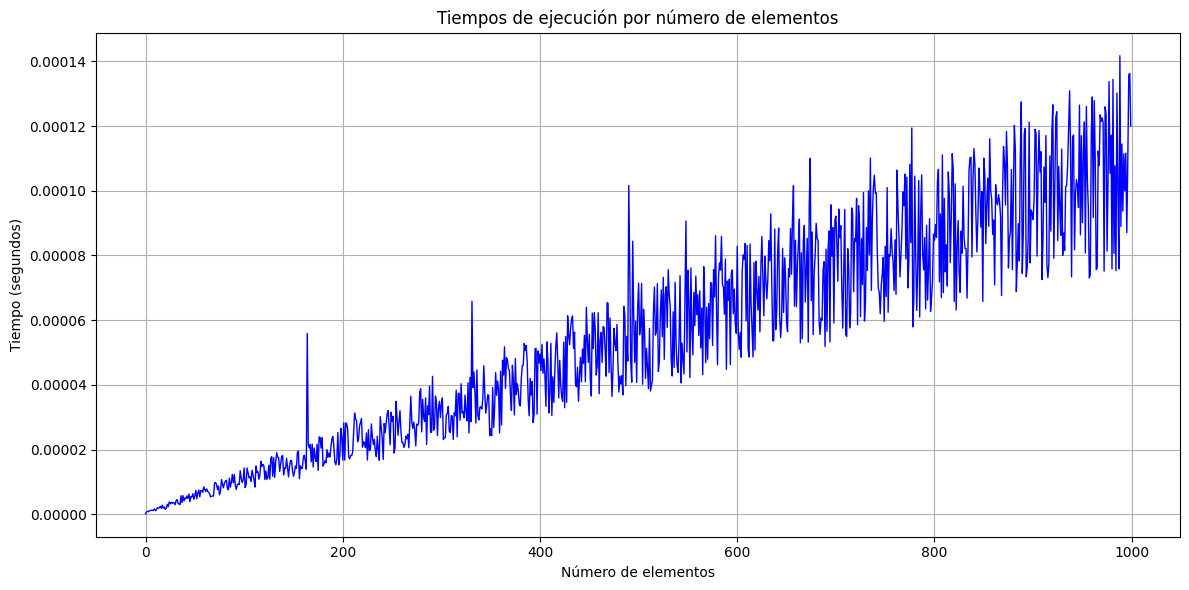

In [27]:
def insertion(lista):
    for i in range(1, len(lista)):
        actual = lista[i]
        j = i - 1
        while j >= 0 and lista[j].cantidad > actual.cantidad:
            lista[j + 1] = lista[j]
            j -= 1
        lista[j + 1] = actual
    return lista

#Insercion   
def tiempo_insercion():
    diccionario_total={}
    for j in range(5):
        diccionario={}
        r=0
        lista_objetos_tipo_fila=[]
        for i in range(1000):
            while(r<=i):
                lista_objetos_tipo_fila.append(lista_objetos_general[r]) 
                r+=1
            lista_a_usar=lista_objetos_tipo_fila
            start = time.time()
            insertion(lista_a_usar)
            stop= time.time()
            diccionario[i]=stop-start
            
        diccionario_total[j]=diccionario
    
    promedio(diccionario_total,Insercion)
    graficador(Insercion,"Insercion")
    rearmarJSON(lista_a_usar,"Insercion")
    return Insercion

Insercion=tiempo_insercion()
print(Insercion)

{0: 1.1444091796875e-06, 1: 1.1920928955078125e-06, 2: 1.4781951904296875e-06, 3: 1.1444091796875e-06, 4: 1.3828277587890625e-06, 5: 1.621246337890625e-06, 6: 1.9550323486328123e-06, 7: 2.2411346435546876e-06, 8: 2.8133392333984377e-06, 9: 4.1961669921875e-06, 10: 4.1961669921875e-06, 11: 4.816055297851562e-06, 12: 9.1552734375e-06, 13: 5.7220458984375e-06, 14: 5.7220458984375e-06, 15: 6.866455078125e-06, 16: 7.295608520507813e-06, 17: 8.296966552734374e-06, 18: 8.7738037109375e-06, 19: 9.489059448242187e-06, 20: 1.0538101196289063e-05, 21: 1.163482666015625e-05, 22: 1.2874603271484375e-05, 23: 1.3399124145507813e-05, 24: 1.4972686767578124e-05, 25: 1.6498565673828126e-05, 26: 1.7261505126953126e-05, 27: 1.8405914306640626e-05, 28: 2.1457672119140625e-05, 29: 2.3174285888671876e-05, 30: 3.4427642822265626e-05, 31: 2.5796890258789063e-05, 32: 2.7227401733398438e-05, 33: 3.881454467773438e-05, 34: 3.333091735839844e-05, 35: 3.309249877929688e-05, 36: 3.2901763916015625e-05, 37: 3.2281875

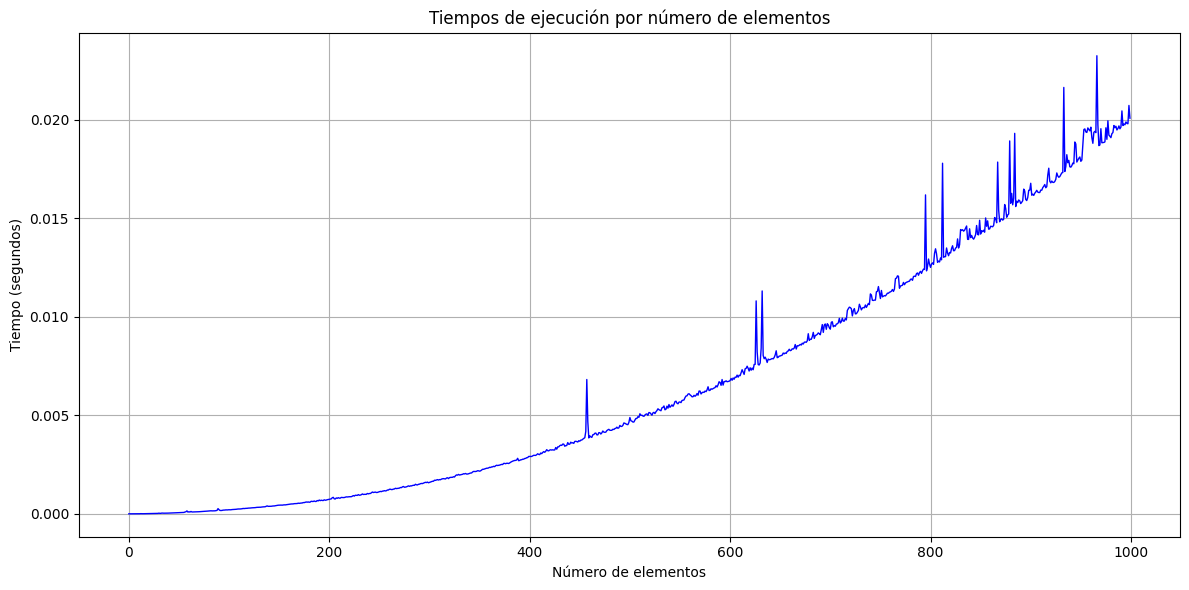

In [24]:
def bubble_sort(lista):
    n = len(lista)
    for i in range(n):
        for j in range(0, n - i - 1):
            if lista[j].cantidad > lista[j + 1].cantidad:
                lista[j], lista[j + 1] = lista[j + 1], lista[j]
    return lista

def tiempo_bubble_sort():
    diccionario_total={}
    for j in range(5):
        diccionario={}
        r=0
        lista_objetos_tipo_fila=[]
        for i in range(1000):
            while(r<=i):
                lista_objetos_tipo_fila.append(lista_objetos_general[r]) 
                r+=1
            lista_a_usar=lista_objetos_tipo_fila
            start = time.time()
            bubble_sort(lista_a_usar)
            stop= time.time()
            diccionario[i]=stop-start
            
            
        diccionario_total[j]=diccionario
    Bubble_sort={}
    promedio(diccionario_total,Bubble_sort)
    graficador(Bubble_sort,"Bubble_Sort")
    rearmarJSON(lista_a_usar,"Bubble_Sort")
    return Bubble_sort

Bubble_sort=tiempo_bubble_sort()
print(Bubble_sort)

{0: 1.8596649169921875e-06, 1: 1.4781951904296875e-06, 2: 1.33514404296875e-06, 3: 1.5735626220703124e-06, 4: 1.621246337890625e-06, 5: 1.5735626220703124e-06, 6: 1.71661376953125e-06, 7: 2.0503997802734374e-06, 8: 2.2411346435546876e-06, 9: 2.2411346435546876e-06, 10: 2.09808349609375e-06, 11: 2.2411346435546876e-06, 12: 2.4318695068359373e-06, 13: 2.956390380859375e-06, 14: 2.1457672119140625e-06, 15: 3.0517578125e-06, 16: 3.1948089599609376e-06, 17: 3.0040740966796874e-06, 18: 3.0517578125e-06, 19: 2.956390380859375e-06, 20: 3.2901763916015627e-06, 21: 3.337860107421875e-06, 22: 3.6716461181640626e-06, 23: 4.00543212890625e-06, 24: 3.719329833984375e-06, 25: 4.434585571289063e-06, 26: 4.339218139648437e-06, 27: 3.910064697265625e-06, 28: 4.243850708007813e-06, 29: 4.625320434570312e-06, 30: 4.911422729492188e-06, 31: 4.816055297851562e-06, 32: 4.911422729492188e-06, 33: 5.054473876953125e-06, 34: 5.388259887695313e-06, 35: 5.245208740234375e-06, 36: 5.578994750976562e-06, 37: 5.7220

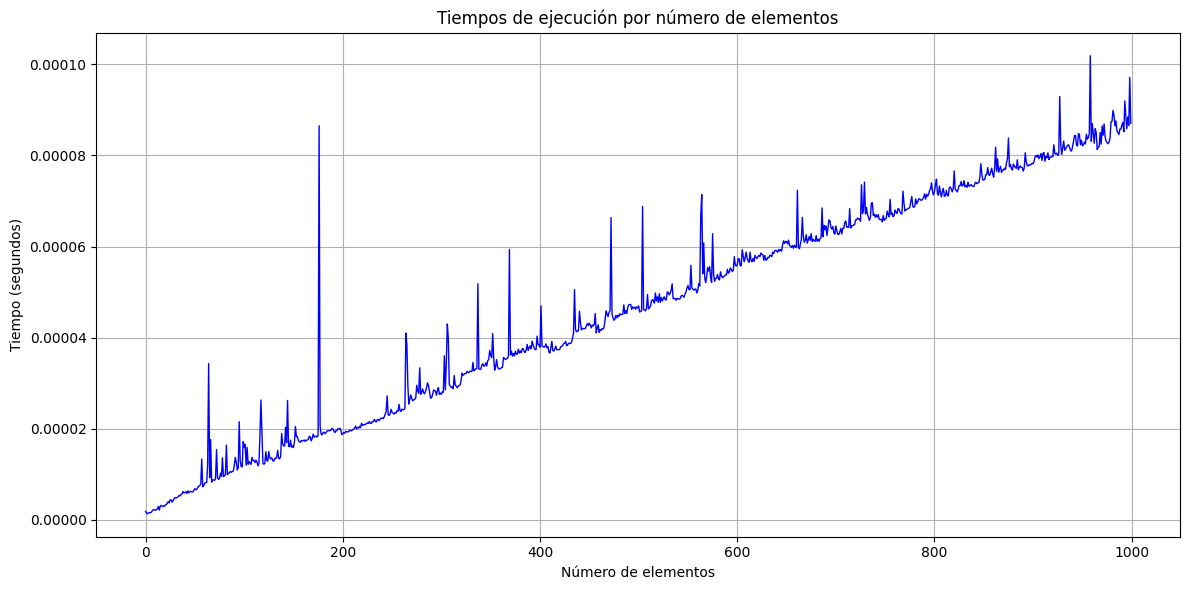

In [28]:
def counting_sort(lista):
    if not lista:
        return lista

    max_cantidad = max(obj.cantidad for obj in lista)
    min_cantidad = min(obj.cantidad for obj in lista)

    rango = max_cantidad - min_cantidad + 1
    count = [[] for _ in range(rango)]

    for obj in lista:
        count[obj.cantidad - min_cantidad].append(obj)

    resultado = []
    for bucket in count:
        resultado.extend(bucket)

    return resultado

def tiempo_counting_sort():
    diccionario_total={}
    for j in range(5):
        diccionario={}
        r=0
        lista_objetos_tipo_fila=[]
        for i in range(1000):
            while(r<=i):
                lista_objetos_tipo_fila.append(lista_objetos_general[r]) 
                r+=1
            lista_a_usar=lista_objetos_tipo_fila
            start = time.time()
            counting_sort(lista_a_usar)
            stop= time.time()
            diccionario[i]=stop-start
            
        diccionario_total[j]=diccionario
    Counting_sort={}
    promedio(diccionario_total,Counting_sort)
    graficador(Counting_sort,"Counting_sort")
    rearmarJSON(lista_a_usar,"CountingSort")
    return Counting_sort

Counting_sort=tiempo_counting_sort()
print(Counting_sort)

{0: 4.291534423828125e-07, 1: 1.049041748046875e-06, 2: 9.5367431640625e-07, 3: 9.5367431640625e-07, 4: 2.574920654296875e-06, 5: 2.09808349609375e-06, 6: 2.384185791015625e-06, 7: 2.193450927734375e-06, 8: 3.0517578125e-06, 9: 3.814697265625e-06, 10: 3.4809112548828124e-06, 11: 3.957748413085938e-06, 12: 4.1961669921875e-06, 13: 5.435943603515625e-06, 14: 4.57763671875e-06, 15: 5.817413330078125e-06, 16: 5.340576171875e-06, 17: 6.4373016357421875e-06, 18: 6.008148193359375e-06, 19: 6.866455078125e-06, 20: 6.151199340820313e-06, 21: 6.4373016357421875e-06, 22: 7.43865966796875e-06, 23: 7.05718994140625e-06, 24: 9.441375732421875e-06, 25: 9.202957153320313e-06, 26: 1.0442733764648437e-05, 27: 1.0347366333007812e-05, 28: 1.1348724365234375e-05, 29: 1.125335693359375e-05, 30: 1.1682510375976562e-05, 31: 1.1730194091796876e-05, 32: 1.2493133544921875e-05, 33: 1.2826919555664062e-05, 34: 1.2731552124023437e-05, 35: 1.3589859008789062e-05, 36: 1.3017654418945313e-05, 37: 1.3113021850585938e-

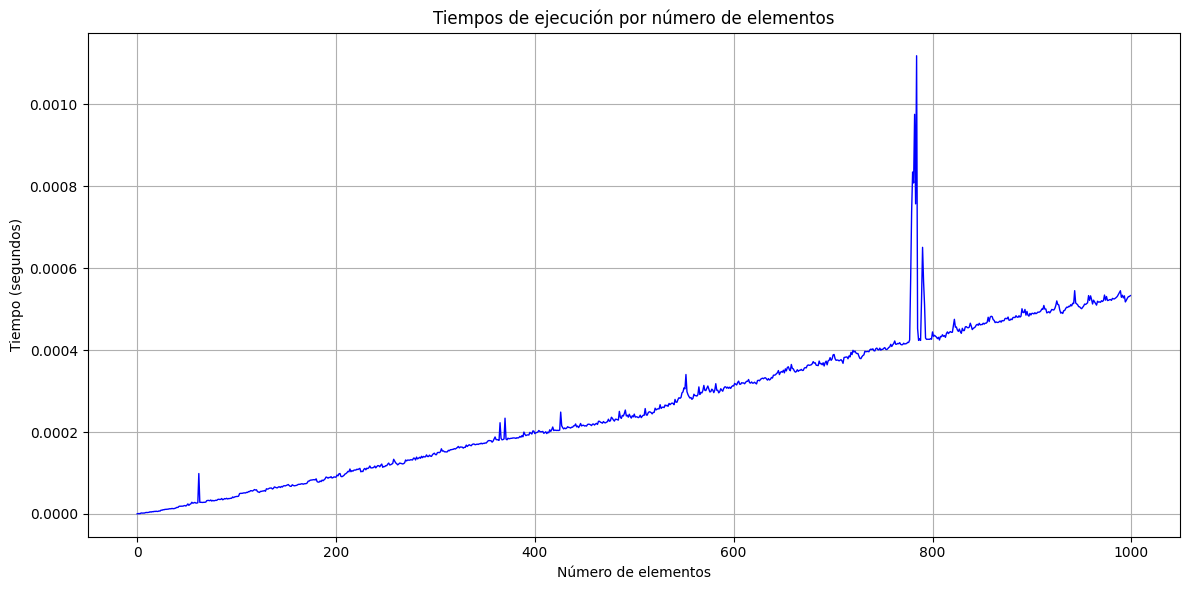

In [30]:
def partition(array, low, high):
    pivot = array[(low + high) // 2].cantidad
    i = low
    j = high
    while i <= j:
        while array[i].cantidad < pivot:
            i += 1
        while array[j].cantidad > pivot:
            j -= 1
        if i <= j:
            array[i], array[j] = array[j], array[i]
            i += 1
            j -= 1
    return i, j  # Devolvemos ambos índices para saber los límites

def quick_sort_iterative(array):
    stack = [(0, len(array) - 1)]
    while stack:
        low, high = stack.pop()
        if low < high:
            i, j = partition(array, low, high)
            if low < j:
                stack.append((low, j))
            if i < high:
                stack.append((i, high))
                
def tiempo_quick_sort():
    diccionario_total={}
    for j in range(5):
        diccionario={}
        r=0
        lista_objetos_tipo_fila=[]
        for i in range(1000):
            while(r<=i):
                lista_objetos_tipo_fila.append(lista_objetos_general[r])
                r+=1
            lista_a_usar=lista_objetos_tipo_fila
            start = time.time()
            quick_sort_iterative(lista_a_usar)
            stop= time.time()
            diccionario[i]=stop-start
            
        diccionario_total[j]=diccionario
    Quick_sort={}
    promedio(diccionario_total,Quick_sort)
    graficador(Quick_sort,"Quick_sort")
    rearmarJSON(lista_a_usar,"QuickSort")
    return Quick_sort

Quick_sort=tiempo_quick_sort()
print(Quick_sort)

In [ ]:
from dask.distributed import Client
from dask import delayed, compute

client = Client(processes=True, n_workers=4, threads_per_worker=1)
t1 = delayed(tiempo_quick_sort)()
t2 = delayed(tiempo_counting_sort)()
t3 = delayed(tiempo_bubble_sort)()
t4 = delayed(tiempo_insercion)()
Quick_sort, Counting_sort, Bubble_sort, Insercion = compute(t1, t2, t3, t4,scheduler=client)
client.close()


/opt/anaconda3/envs/ed2/lib/python3.10/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 55476 instead
  warnings.warn(


38.657710790634155
<Client: 'tcp://127.0.0.1:55477' processes=4 threads=4, memory=8.00 GiB>


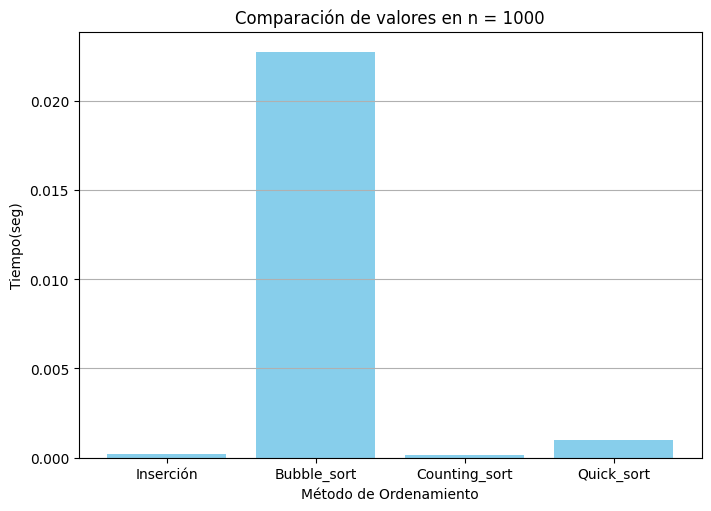

In [34]:
def grafica_general(dic1, dic2, dic3, dic4):
    diccionarios = [dic1, dic2, dic3, dic4]
    etiquetas = ["Inserción", "Bubble_sort", "Counting_sort", "Quick_sort"]
    
    valores = []
    for i, dic in enumerate(diccionarios):
        valor = dic.get(999, None)
        if valor is None:
            print(f"Advertencia: {etiquetas[i]} no contiene la clave 999.")
            valor = 0
        valores.append(valor)

    fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
    ax.bar(etiquetas, valores, color='skyblue')

    ax.set_title('Comparación de valores en n = 1000')
    ax.set_xlabel('Método de Ordenamiento')
    ax.set_ylabel('Tiempo(seg)')
    ax.grid(axis='y')

    fig.savefig('grafico.png', bbox_inches='tight')
    plt.show()
    

grafica_general(Insercion,Bubble_sort,Counting_sort,Quick_sort)